# Example application of Hyperdense layer for PyTorch

## Setup

In [3]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, activations, initializers

import keras

import torch
import torch.nn as nn

from torch.autograd import Variable

2024-06-30 15:22:39.458675: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-30 15:22:39.505583: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-30 15:22:39.506378: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-30 15:22:40.128305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
from HypercomplexKeras import HyperdenseTorch
from HypercomplexKeras import Algebra

## Example application

predicted =  tensor([0.3289, 0.6711, 0.6799, 0.3287], grad_fn=<SelectBackward0>)
predicted (rounded) =  tensor([0., 1., 1., 0.], grad_fn=<RoundBackward0>)
expected =  tensor([0., 1., 1., 0.])


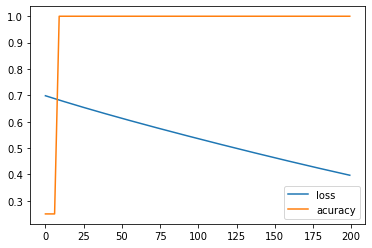

In [5]:
from collections import OrderedDict

import matplotlib.pylab as plt


#data:
x_train = torch.Tensor(np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0],  [0, 0, 0, 1]], dtype = np.dtype(float))).to(torch.float)
y_train = torch.Tensor(np.array([[0], [1], [1],  [0]])[:,0]).to(torch.float)


#model
model = nn.Sequential(OrderedDict([
    ("HyperDense", HyperdenseTorch.HyperDenseTorch(10, (4,), activation = torch.tanh )),
    ("Dense", nn.Linear(40,1)),
    ('Sigmoid', nn.Sigmoid())
        ]))

#init
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
torch.manual_seed(1)

num_epoch = 200

loss_hist_train = [0]*num_epoch
accuracy_hist_train = [0]*num_epoch
loss_hist_train = [0]*num_epoch



#training loop
for epoch in range(num_epoch):
    pred = model(x_train)[:,0]
    #pred = model(x_train)
    #print("epoch = ", epoch)
    #print("pred = ", pred)
    #print("y_train = ", y_train)
    loss = loss_fn(pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist_train[epoch] += loss.item()
    is_correct  = ((pred >= 0.5).float() == y_train).float()
    accuracy_hist_train[epoch] += is_correct.mean()

    
#summary
pred = model(x_train)[:,0]
print("predicted = ", pred)
print("predicted (rounded) = ", pred.round())
print("expected = ", y_train)
assert (pred.round() == y_train).all()

plt.plot(loss_hist_train, label = "loss")
plt.plot(accuracy_hist_train, label = "acuracy")
plt.legend()
plt.show()

